In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

#### Original GOES ABI Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.time.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 50000
df_original_tb = df_original_tb.where(df_original_tb.ast_mod_n >= 50000)

# Drop observation from 2019-05-13 18:51:22 (cloudy)
drop_idx_list = [df_original_tb.index[i] for i in [14]]
df_original_tb.drop(drop_idx_list, inplace=True)

# preview
#df_original_tb.head(1)

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [3]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.time.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 50000
df_ortho_tb = df_ortho_tb.where(df_ortho_tb.ast_mod_n >= 50000)
# Drop observation from 2019-05-13 18:51:22 (cloudy)
df_ortho_tb.drop(drop_idx_list, inplace=True)
# preview
#df_ortho_tb.head(1)

---

### Plot Brightness Temperature Summary Stats Together

In [4]:
# Make difference dataframe
df_change_tb = df_ortho_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath']) - \
               df_original_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath'])

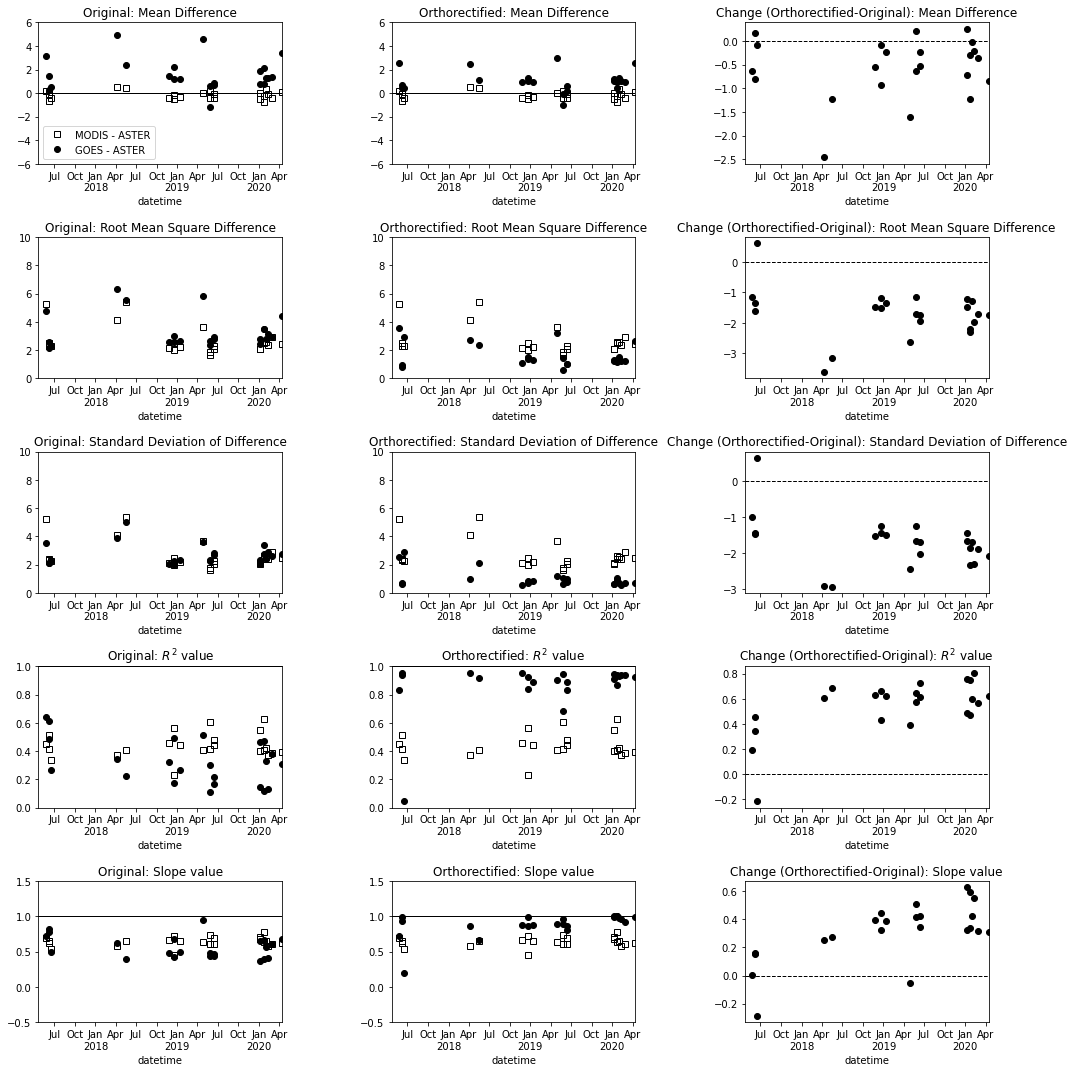

In [11]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='GOES - ASTER')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[3],  label='GOES - ASTER')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[6],  label='GOES - ASTER')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[9],  label='GOES : ASTER')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none',marker='o',  c='k', ax=ax[12],  label='GOES : ASTER')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='GOES - ASTER')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-6,6)
ax[1].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none',marker='o',  c='k', ax=ax[4],  label='GOES - ASTER')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[7],  label='GOES - ASTER')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none',marker='s',  mfc='none', mec='k', ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[10],  label='GOES : ASTER')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='k',linewidth=1)

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[13],  label='GOES : ASTER')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='k',linewidth=1)


### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='GOES - ASTER')
ax[2].set_title('Change (Orthorectified-Original): Mean Difference')
#ax[2].set_ylim(-3,3)
ax[2].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[5],  label='GOES - ASTER')
ax[5].set_title('Change (Orthorectified-Original): Root Mean Square Difference')
#ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[8],  label='GOES - ASTER')
ax[8].set_title('Change (Orthorectified-Original): Standard Deviation of Difference')
#ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[11],  label='GOES : ASTER')
ax[11].set_title('Change (Orthorectified-Original): $R^2$ value')
#ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[14],  label='GOES : ASTER')
ax[14].set_title('Change (Orthorectified-Original): Slope value')
#ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='k',linestyle='--',linewidth=1)

for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')


In [15]:
df_original_tb.mean()

Unnamed: 0                             13.956522
ast_mod_n                           81228.652174
ast_mod_mean_diff                      -0.163537
ast_mod_median_diff                    -0.139202
ast_mod_mean_squared_diff               8.150669
ast_mod_rms_diff                        2.686136
ast_mod_std_diff                        2.658254
ast_mod_slope                           0.640624
ast_mod_intercept                      96.772822
ast_mod_r_value                         0.658896
ast_mod_p_value                         0.000000
ast_mod_std_err                         0.002639
ast_subpx_mod_n                     81228.652174
ast_subpx_mod_mean_diff                -0.131547
ast_subpx_mod_median_diff              -0.073693
ast_subpx_mod_mean_squared_diff        13.188498
ast_subpx_mod_rms_diff                  3.428614
ast_subpx_mod_std_diff                  3.407409
ast_subpx_mod_slope                     0.451318
ast_subpx_mod_intercept               147.744676
ast_subpx_mod_r_valu

In [16]:
df_ortho_tb.mean()

Unnamed: 0                             13.956522
ast_mod_n                           81228.652174
ast_mod_mean_diff                      -0.163537
ast_mod_median_diff                    -0.139202
ast_mod_mean_squared_diff               8.150669
ast_mod_rms_diff                        2.686136
ast_mod_std_diff                        2.658254
ast_mod_slope                           0.640624
ast_mod_intercept                      96.772822
ast_mod_r_value                         0.658896
ast_mod_p_value                         0.000000
ast_mod_std_err                         0.002639
ast_subpx_mod_n                     81228.652174
ast_subpx_mod_mean_diff                -0.131547
ast_subpx_mod_median_diff              -0.073693
ast_subpx_mod_mean_squared_diff        13.188498
ast_subpx_mod_rms_diff                  3.428614
ast_subpx_mod_std_diff                  3.407409
ast_subpx_mod_slope                     0.451318
ast_subpx_mod_intercept               147.744676
ast_subpx_mod_r_valu

In [18]:
df_change_tb.mean()

ast_mod_n                            0.000000
ast_mod_mean_diff                    0.000000
ast_mod_median_diff                  0.000000
ast_mod_mean_squared_diff            0.000000
ast_mod_rms_diff                     0.000000
ast_mod_std_diff                     0.000000
ast_mod_slope                        0.000000
ast_mod_intercept                    0.000000
ast_mod_r_value                      0.000000
ast_mod_p_value                      0.000000
ast_mod_std_err                      0.000000
ast_subpx_mod_n                      0.000000
ast_subpx_mod_mean_diff              0.000000
ast_subpx_mod_median_diff            0.000000
ast_subpx_mod_mean_squared_diff      0.000000
ast_subpx_mod_rms_diff               0.000000
ast_subpx_mod_std_diff               0.000000
ast_subpx_mod_slope                  0.000000
ast_subpx_mod_intercept              0.000000
ast_subpx_mod_r_value                0.000000
ast_subpx_mod_p_value                0.000000
ast_subpx_mod_std_err             

**Plot MODIS baseline stats only**

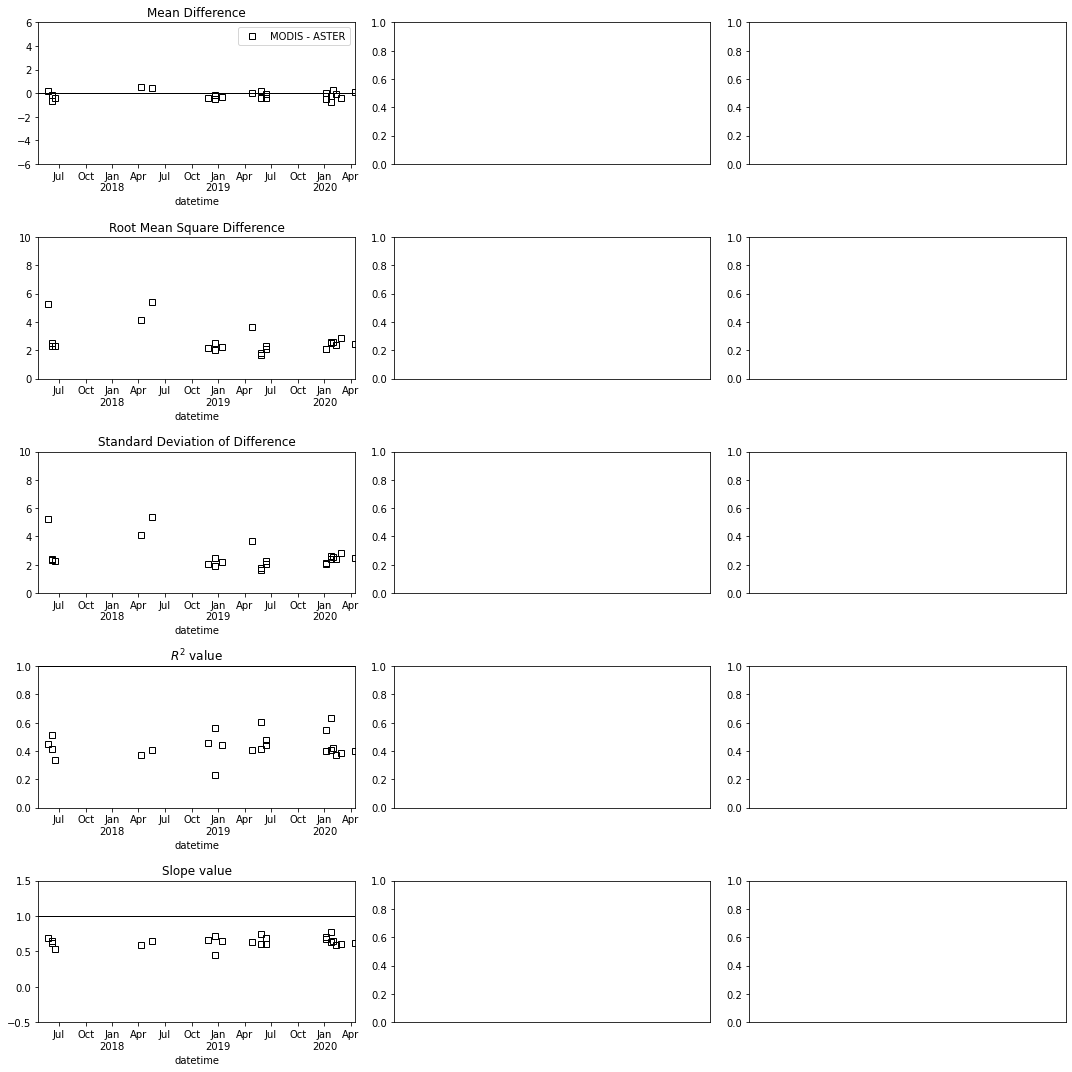

In [19]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
ax[0].set_title('Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
ax[3].set_title('Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
ax[6].set_title('Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
ax[9].set_title('$R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
ax[12].set_title('Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)



for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')
